Project Update

In a Jupyter notebook, demonstrate you have made progress on acquiring data and thinking about your project. The notebook must have the following sections:
Section 1: Project Overview (Markdown)

Provide an overview of your project including the research questions. You may start with the text from your proposal but it must be edited for clarity and include any updates to your thinking.
Section 2: Milestones and Progress (Markdown)

In bullet points or a table, list the project milestones from your proposal for dates up to November 10th. Have you met these milestones? If not, explain what you will do to catch up.

What resources will you need to accomplish your next steps? What is unclear in your plan?
Section 3: Data Acquisition and Cleaning Code (Markdown + Code)

Provide code that demonstrates you have made progress with data acquisition and cleaning. In a markdown cell at the top of the section, summarize what you have accomplished thus far. Then follow through with the code that shows what has been accomplished.

Group: Job Prospect Skeptics

Course: BUDT704

Section: 0503

Date: November 10, 2023

# Project Update
## Project Overview
The goal of our project is to analyze the post-pandemic global job market for Data Scientists, as shown by Data Scientist Salary data, and compare it to the global job market in general during the same time period, as represented by global layoff data. Given that we plan to enter the job market as Data Scientists ourselves, examining the job prospects in our chosen field without the biases that might be present in analyses done by institutions of higher education or industry think tanks is very important to us. We hope the data shows that the career we chose is growing (i.e. there are many jobs and salaries are increasing) and stable (relatively insulated from downturns in the wider economy). To date, we have selected our datasets and conducted data cleaning activities, and begun our analysis and visualizations.

We are looking to answer the following questions:


*   What is the yearly trend(s) of Data Scientist salaries and layoffs?
*   What is the trend of Data Scientist salaries in different countries and are there any countries with significantly stronger or weaker job markets for Data Scientists?
*   What industries are seeing the most layoffs and do any industries in particular show trends that correlate to the Data Science job market?
*   How was the Data Science Market affected by layoffs (correlation between salaries, jobs and layoffs)? Only correlation with layoffs in certain industries?
*   Did the high rate of remote job hiring during the pandemic result in mass layoffs in the post-covid work environment?

## Milestones and Progress
Based on our initial schedule, by the time of submitting this updated we expected to have completed the following tasks:


*   Preliminary Analysis of Our Datasets
*   Initial Data Cleaning Activities
*   Decided How To Address Any Missing Data
*   Transformed Our Data into Formats that Better Facilitate Our Analysis
*   Created Preliminary Data Visualizations
*   Conducted Initial Analysis of Our Data
*   Come to Initial Conclusions Regarding our Research Questions


At this time we are still finishing our initial analysis and crafting of initial conclusions. Based on our preliminary timeline, we are four days behind schedule. However, while we are behind schedule, we have enough slack in our schedule to catch up. To get back on schedule we will finish our initial analysis and craft our initial answers to our questions over the coming weekend. With that accomplished, we will be back on track.


## Data Acquisition and Cleaning
### Salary Dataset
Having acquired our two datasets, we conducted some exploratory analysis of both. Beginning with the Data Scientist Salary data, we found this dataset to be clean already. There was no missing data, and there was already a column that had converted all salaries into US Dollars. The only work we did to this dataset was to add a column with the name of the country that corresponds to the two letter code in company_location. Using a public dataset on DataHub.io which lists countries and their two letter codes to map country names to country codes.

### Layoffs Dataset
Our second dataset was not as clean as the first with significant amounts of missing data across four columns: Percentage, Funds_Raised, Laid_Off_Count, and List_of_Employees_Laid_Off. We are not concerned about the missing data in Funds_Raised or List_of_Employees_Laid_Off, as these variables are not likely to prove material to our analysis. Percentage and Laid_Off_Count could prove to be more problematic, as measures of the size of layoffs are material to our research, and this data is missing for approximately one third of the observations. To deal with this missing data, we will create two versions of this dataset: one with the Percentage and Laid_Off_Count columns and observations missing data dropped, the other without these columns and no observations.

Both of our datasets were acquired via Kaggle.com.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/704Project_Job_Prospect_Skeptics/' #works for Harry
# path = '/content/drive/My Drive/704Project_Job_Prospect_Skeptics/'
#path = ''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Salary dataset
After importing the data and conducting some exploratory analysis we found no missing data, and found the highest paying jobs to confirm that the data was relevant to our intended analysis.

In [ ]:
df_salary = pd.read_csv(path+"ds_salaries.csv")
df_salary.head()

FileNotFoundError: ignored

In [ ]:
df_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
# confirm no missing data
df_salary.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

One thing piece of information that it will be helpful to have is which country each location code maps to. We mapped this information using a public dataset of Countries and their two letter codes from DataHub.io.

In [ ]:
#import data
df_country_codes = pd.read_csv(path+'country_codes.csv')
df_country_codes.set_index('Code', inplace=True)
df_country_codes.head()

,Name
Code,
AF,Afghanistan
AX,Åland Islands
AL,Albania
DZ,Algeria
AS,American Samoa
...,...
WF,Wallis and Futuna
EH,Western Sahara
YE,Yemen


In [ ]:
#add column with full company name
df_salary['company_location_full'] = df_salary['company_location'].map(lambda x: df_country_codes.loc[x, 'Name'])

In [ ]:
# Find the top 10 average salaries by job title and plot
top_jobs=df_salary.groupby('job_title').mean().sort_values(by='salary_in_usd', ascending=False).head(10)
top_jobs.reset_index(inplace=True)
top_jobs.head()

<ipython-input-34-79b0c0f7695c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,job_title,work_year,salary,salary_in_usd,remote_ratio
0,Data Science Tech Lead,2022.00,375000.0,375000.000,50.0
1,Cloud Data Architect,2021.00,250000.0,250000.000,50.0
2,Data Lead,2023.00,212500.0,212500.000,0.0
3,Data Analytics Lead,2022.50,922500.0,211254.500,75.0
4,Principal Data Scientist,2021.25,190875.0,198171.125,87.5


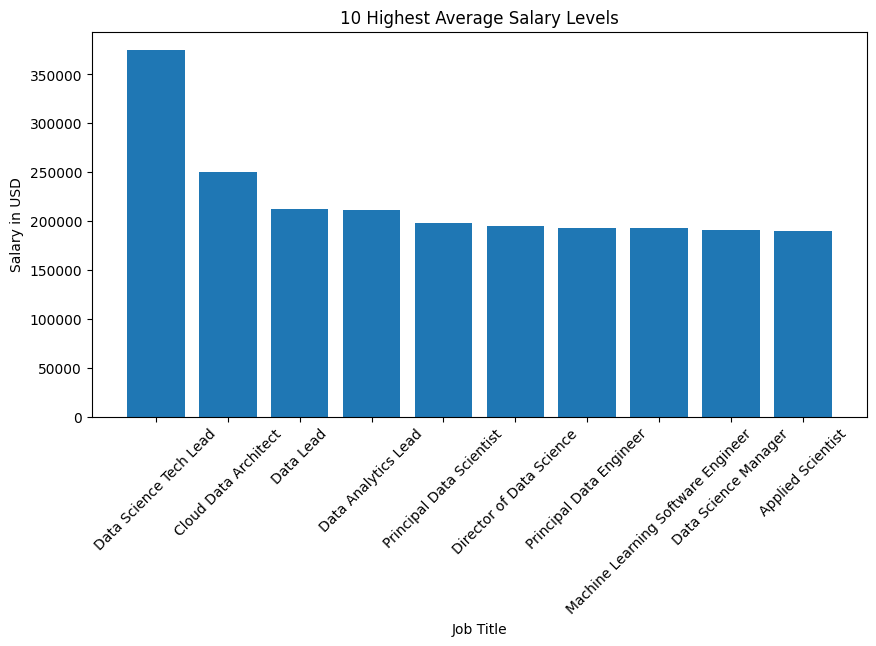

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(top_jobs['job_title'], top_jobs['salary_in_usd'])
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('10 Highest Average Salary Levels')
plt.xticks(rotation=45)
plt.show()

As we can see, the higest earning jobs are leadership positions, as indicated by the presence of 'Lead', 'Principal', 'Director', or 'Manager' in the in the job title.

---

### Layoffs dataset
After importing the data and conducting some exploratory analysis we found significant amounts of missing data.

In [ ]:
# Import data, all shown observations have a List_of_Employees_Laid_Off value of 'Unknown'
df_layoffs = pd.read_csv(path + "layoffs_data.csv")
df_layoffs.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2733,Service,Los Angeles,Travel,1.00,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,NaN,Unknown
2734,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,Unknown
2735,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,Unknown
2736,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,Unknown


In [ ]:
df_layoffs.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [ ]:
# significant amounts of missing data in Percentage, Funds_Raised and Laid_Off_Count.
layoff_missing_values = df_layoffs.isnull().sum()
layoff_missing_values

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [ ]:
# of unique companies
len(df_layoffs['Company'].unique())

2132

In [ ]:
# Grouping by industry and summing the layoffs
industry_layoffs = df_layoffs.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)

# Bar chart for top industries with the most layoffs
fig1 = px.bar(industry_layoffs,
              title='10 Worst Industries by Number of Layoffs',
              labels={'Industry': 'Industry', 'Laid_Off_Count': 'Number of Layoffs'},
              color_discrete_sequence=px.colors.sequential.RdBu)

fig1.show()

The data shows that the retail and consumer industries have the highest level of layoffs, indicating that they may be inducstries to be avoided.

'Source', 'Date_Added'(when the information was added to the database), and 'List_of_Employees_Laid_Off' (links to Google Docs listing laid-off employees) are not required for our analysis, so we are dropping these columns. With done, we calculated what percentage of each column is missing data.

In [ ]:
df_layoffs.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

In [ ]:
number_of_rows = df_layoffs['Company'].count()
missing_percentage = (layoff_missing_values /number_of_rows) * 100
missing_percentage

Company                        0.000000
Location_HQ                    0.000000
Industry                       0.000000
Percentage                    33.564646
Date                           0.000000
Source                         0.000000
Funds_Raised                   9.934259
Stage                          0.000000
Date_Added                     0.000000
Country                        0.000000
Laid_Off_Count                31.665449
List_of_Employees_Laid_Off     0.036523
dtype: float64

We checked to see if there were any rows that were duplicates. Duplicates were deleted, keeping the first instance.

In [ ]:
#Check if there are any duplicate records, delete duplicates, keeping first instance
count_true = (df_layoffs.duplicated() == True).sum()
print(f'There is/are {count_true} duplicate(s).')
if count_true != 0:
    df_layoffs.drop_duplicates(keep='first', inplace=True)

There is/are 1 duplicate(s).


Next, we transformed the Date column so that the dates are now datetime objects.

In [ ]:
# Date string to datetime
df_layoffs['Date'] = pd.to_datetime(df_layoffs['Date'], format='%Y-%m-%d')

Additionally, to facilitate analysis of the size of layoffs, we created additional dataframes that drop observations that either don't have a percentage value or don't have a Laid_Off_Count.

In [ ]:
has_percentage = pd.notnull(df_layoffs['Percentage'])
df_layoffs_has_percentage = df_layoffs[has_percentage]
df_layoffs_has_percentage.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,197.0,Series C,United States,NaN
1,Retool,SF Bay Area,Other,0.09,2023-06-22,141.0,Series C,United States,NaN
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0
6,Friday Health Plans,Alamosa,Healthcare,0.00,2023-06-21,306.0,Private Equity,United States,0.0
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0


In [ ]:
has_count = pd.notnull(df_layoffs['Laid_Off_Count'])
df_layoffs_has_laid_off = df_layoffs[has_count]
df_layoffs_has_laid_off.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0
6,Friday Health Plans,Alamosa,Healthcare,0.00,2023-06-21,306.0,Private Equity,United States,0.0
...,...,...,...,...,...,...,...,...,...
2732,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0
2734,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0
2735,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0
2736,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0


We also decided to take a look and see what the distribution of Laid_Off_Count looks like, and it looks like we have some significant potential outliers, with the majority clustered below 500. However, given the high number of potential outliers, we will keep during our initial analysis.

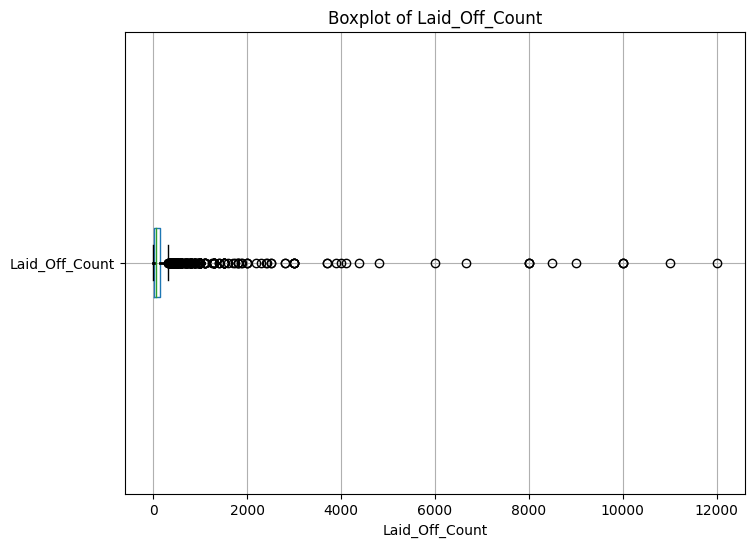

In [ ]:
plt.figure(figsize=(8, 6))
whiskerprops = dict(linewidth=2)  # Adjusting the linewidth to control the width of the whiskers
df_layoffs_has_laid_off.boxplot(column='Laid_Off_Count', vert=False, whiskerprops=whiskerprops)
plt.title('Boxplot of Laid_Off_Count')
plt.xlabel('Laid_Off_Count')
plt.show()

"We pledge on our honor that we have not given nor recieved any unauthorized assistance on this assignment" --Job Prospect Skeptics